**1. Create a csv to save the original data and upload it to github**

In [186]:
import pandas as pd
import numpy as np 
# read csv from github 
flight = pd.read_csv('https://raw.githubusercontent.com/alexsong77/DAV-5400/master/untidy.csv')
flight

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


**2. Dropped the NaN value<br>
     Renameed the column name<br>
     Used the melt function to convert into long format<br>
     Filled the Nan value by previous airline name<br> 
     Changed the variable and value name<br>
     Reordered the sequence of the headers<br>
     Sorted the columns by Airline and City**
    
    

In [185]:
# drop the none value 
flight.dropna(how='all',inplace=True)
flight 

,Airline,Ontime or Delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [70]:
# rename the columns 
flight.columns = ['Airline','Ontime or Delayed','Los Angeles','Phoenix','San Diego','San Francisco','Seattle']
flight


,Airline,Ontime or Delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [79]:
# change the dataset from wide format to long format by setting the "Airline" and "Ontime or Delayed" as id variable
flight1 = flight.melt(id_vars=['Airline','Ontime or Delayed'],value_vars=['Los Angeles','Phoenix','San Diego','San Francisco','Seattle'])

In [80]:
flight1

,Airline,Ontime or Delayed,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,NaN,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,NaN,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,NaN,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,NaN,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,NaN,delayed,San Diego,20.0


In [81]:
#fill Nan value (delayed) by fill the same value with (on time) 
flight1['Airline'].fillna(method='ffill', inplace=True)

In [113]:
flight1

,Airline,Ontime or Delayed,City,Number of Flights
0,ALASKA,on time,Los Angeles,497.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
1,ALASKA,delayed,Los Angeles,62.0
5,ALASKA,delayed,Phoenix,12.0
4,ALASKA,on time,Phoenix,221.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
11,AM WEST,delayed,San Diego,65.0
10,AM WEST,on time,San Diego,383.0


In [198]:
# rename column for variable and value to "City" and "Number of Flights"
flight1.rename(columns={'variable':'City', 'value':'Number of Flights'},inplace=True)
flight1

,Airline,Ontime or Delayed,City,Number of Flights
0,ALASKA,on time,Los Angeles,497.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
1,ALASKA,delayed,Los Angeles,62.0
5,ALASKA,delayed,Phoenix,12.0
4,ALASKA,on time,Phoenix,221.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
11,AM WEST,delayed,San Diego,65.0
10,AM WEST,on time,San Diego,383.0


In [115]:
#reoder the sequence of the header 
flight2 = flight1[['City','Airline','Ontime or Delayed','Number of Flights']]
flight2


,City,Airline,Ontime or Delayed,Number of Flights
0,Los Angeles,ALASKA,on time,497.0
2,Los Angeles,AM WEST,on time,694.0
3,Los Angeles,AM WEST,delayed,117.0
1,Los Angeles,ALASKA,delayed,62.0
5,Phoenix,ALASKA,delayed,12.0
4,Phoenix,ALASKA,on time,221.0
6,Phoenix,AM WEST,on time,4840.0
7,Phoenix,AM WEST,delayed,415.0
11,San Diego,AM WEST,delayed,65.0
10,San Diego,AM WEST,on time,383.0


In [202]:
# sorted by the "Airline" and "City"
flight2.sort_values(by=['Airline','City'],inplace=True)
flight2

,City,Airline,Ontime or Delayed,Number of Flights
0,Los Angeles,ALASKA,on time,497.0
1,Los Angeles,ALASKA,delayed,62.0
5,Phoenix,ALASKA,delayed,12.0
4,Phoenix,ALASKA,on time,221.0
9,San Diego,ALASKA,delayed,20.0
8,San Diego,ALASKA,on time,212.0
12,San Francisco,ALASKA,on time,503.0
13,San Francisco,ALASKA,delayed,102.0
16,Seattle,ALASKA,on time,1841.0
17,Seattle,ALASKA,delayed,305.0


**3.(1) For each city, which airline had the best on time performance? <br>
     Extract data from tidy dataset flight2 to get the total number of flights for each airline in different cities<br>
     Groupby and making a frame to contain the total number of flights that including both ontime and delayed<br> 
     Used Merge functions to combine total number of ontime flights and total number of flights into one frame<br>
     Used total number of ontime flights to divide the total number of flights to get the percentage<br>
     Created a bar chart to compared two airlines under different cities<br>
     Find out the best performance**


In [153]:
# Extract total number of flights for ontime 
flight_ontime = flight2[flight2['Ontime or Delayed']=='on time'][['Airline','City','Number of Flights']]
flight_ontime

,Airline,City,Number of Flights
0,ALASKA,Los Angeles,497.0
4,ALASKA,Phoenix,221.0
8,ALASKA,San Diego,212.0
12,ALASKA,San Francisco,503.0
16,ALASKA,Seattle,1841.0
2,AM WEST,Los Angeles,694.0
6,AM WEST,Phoenix,4840.0
10,AM WEST,San Diego,383.0
14,AM WEST,San Francisco,320.0
18,AM WEST,Seattle,201.0


In [189]:
# create a frame to contain the total number of flights
flight_ontimetotal = flight2.groupby(['Airline','City']).sum()['Number of Flights'].to_frame()
flight_ontimetotal

Number of Flights
Airline City                            
ALASKA  Los Angeles                559.0
        Phoenix                    233.0
        San Diego                  232.0
        San Francisco              605.0
        Seattle                   2146.0
AM WEST Los Angeles                811.0
        Phoenix                   5255.0
        San Diego                  448.0
        San Francisco              449.0
        Seattle                    262.0

In [194]:
# used merge to combine into one frame 
flight_merge = pd.merge(flight_ontime,flight_ontimetotal,on=['Airline','City'],how='outer', suffixes=(' ontime',' ontimetotal'))
flight_merge

,Airline,City,Number of Flights ontime,Number of Flights ontimetotal
0,ALASKA,Los Angeles,497.0,559.0
1,ALASKA,Phoenix,221.0,233.0
2,ALASKA,San Diego,212.0,232.0
3,ALASKA,San Francisco,503.0,605.0
4,ALASKA,Seattle,1841.0,2146.0
5,AM WEST,Los Angeles,694.0,811.0
6,AM WEST,Phoenix,4840.0,5255.0
7,AM WEST,San Diego,383.0,448.0
8,AM WEST,San Francisco,320.0,449.0
9,AM WEST,Seattle,201.0,262.0


In [206]:
# get the percentage for each airline under different cities 
flight_merge['flight_percentage'] = flight_merge['Number of Flights ontime']/flight_merge['Number of Flights ontimetotal']
flight_merge

,Airline,City,Number of Flights ontime,Number of Flights ontimetotal,flight_percentage
0,ALASKA,Los Angeles,497.0,559.0,0.889088
1,ALASKA,Phoenix,221.0,233.0,0.948498
2,ALASKA,San Diego,212.0,232.0,0.913793
3,ALASKA,San Francisco,503.0,605.0,0.831405
4,ALASKA,Seattle,1841.0,2146.0,0.857875
5,AM WEST,Los Angeles,694.0,811.0,0.855734
6,AM WEST,Phoenix,4840.0,5255.0,0.921028
7,AM WEST,San Diego,383.0,448.0,0.854911
8,AM WEST,San Francisco,320.0,449.0,0.712695
9,AM WEST,Seattle,201.0,262.0,0.767176


In [234]:
# sorted by the city 
flight_merge1 = flight_merge.sort_values('City')
flight_merge1

,Airline,City,Number of Flights ontime,Number of Flights ontimetotal,flight_percentage
5,AM WEST,Los Angeles,694.0,811.0,0.855734
0,ALASKA,Los Angeles,497.0,559.0,0.889088
6,AM WEST,Phoenix,4840.0,5255.0,0.921028
1,ALASKA,Phoenix,221.0,233.0,0.948498
7,AM WEST,San Diego,383.0,448.0,0.854911
2,ALASKA,San Diego,212.0,232.0,0.913793
8,AM WEST,San Francisco,320.0,449.0,0.712695
3,ALASKA,San Francisco,503.0,605.0,0.831405
9,AM WEST,Seattle,201.0,262.0,0.767176
4,ALASKA,Seattle,1841.0,2146.0,0.857875


In [236]:
# reodered the sequence 
flight_merge2 = flight_merge1[['City','Airline','flight_percentage','Number of Flights ontime','Number of Flights ontimetotal']]
flight_merge2

,City,Airline,flight_percentage,Number of Flights ontime,Number of Flights ontimetotal
5,Los Angeles,AM WEST,0.855734,694.0,811.0
0,Los Angeles,ALASKA,0.889088,497.0,559.0
6,Phoenix,AM WEST,0.921028,4840.0,5255.0
1,Phoenix,ALASKA,0.948498,221.0,233.0
7,San Diego,AM WEST,0.854911,383.0,448.0
2,San Diego,ALASKA,0.913793,212.0,232.0
8,San Francisco,AM WEST,0.712695,320.0,449.0
3,San Francisco,ALASKA,0.831405,503.0,605.0
9,Seattle,AM WEST,0.767176,201.0,262.0
4,Seattle,ALASKA,0.857875,1841.0,2146.0


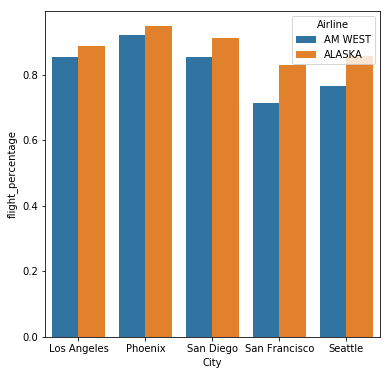

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a bar chart to visualize the comparison for flight percentage under different cities 
plt.figure(figsize=(6,6))
sns.barplot(x='City', y='flight_percentage',hue='Airline', data=flight_merge2)


**3.(1) Conclusion: For each city, ALASKA has the best on time performance**

**3.(2)Which airline had the best overall on time performance?<br>
    Find out total number of ontime flights for each airlines 'ALASKA' and 'AM WEST'<br>
    Find out total number of flights for each airlines 'ALASKA' and 'AM WEST'<br>
    Calculated the percentage of ontime flights for eahc airlines<br>
    Compared two airlines**

In [144]:
# find out total ontime number of flights for 'ALASKA'
flight1_sum = flight_ontime[flight_ontime['Airline']=='ALASKA'].sum()['Number of Flights']
flight1_sum

3274.0

In [145]:
# find out total ontime number of flights for 'AM WEST'
flight2_sum = flight_ontime[flight_ontime['Airline']=='AM WEST'].sum()['Number of Flights']
flight2_sum

6438.0

In [147]:
# find out total number of flights for 'ALASKA'
flight1_totalsum = flight2[flight2['Airline']=='ALASKA']['Number of Flights'].sum()
flight1_totalsum

3775.0

In [131]:
# find out total number of flights for 'AM WEST'
flight2_totalsum = flight2[flight2['Airline']=='AM WEST']['Number of Flights'].sum()
flight2_totalsum

7225.0

In [150]:
# get the percentage of ontime flights for 'ALASKA'
flight1_result = flight1_sum/flight1_totalsum
flight1_result

0.8672847682119206

In [250]:
# get the percentage of ontime flights for 'AM WEST'
flight2_result = flight2_sum/flight2_totalsum
flight2_result

0.8910726643598615

**3.(2) Conclusion:AM WEST had the best overall on time performance**

**4. I would consider change it back if I have to analyze the performance under a specific city<br>
     Create a pivot table to contain the original data <br>
     Unstacked the pivot table by ontime and delayed**

In [158]:
# create a pivot table by mimic the origianl format 
flight_pivot= pd.pivot_table(flight1,values='Number of Flights',index=['Airline','Ontime or Delayed'],columns=['City'])
flight_pivot

City                       Los Angeles  Phoenix  San Diego  San Francisco  \
Airline Ontime or Delayed                                                   
ALASKA  delayed                   62.0     12.0       20.0          102.0   
        on time                  497.0    221.0      212.0          503.0   
AM WEST delayed                  117.0    415.0       65.0          129.0   
        on time                  694.0   4840.0      383.0          320.0   

City                       Seattle  
Airline Ontime or Delayed           
ALASKA  delayed              305.0  
        on time             1841.0  
AM WEST delayed               61.0  
        on time              201.0

In [160]:
# unstack the 'Ontime or Delayed' to a wide format 
flight_pivot.unstack('Ontime or Delayed')

City              Los Angeles         Phoenix         San Diego          \
Ontime or Delayed     delayed on time delayed on time   delayed on time   
Airline                                                                   
ALASKA                   62.0   497.0    12.0   221.0      20.0   212.0   
AM WEST                 117.0   694.0   415.0  4840.0      65.0   383.0   

City              San Francisco         Seattle          
Ontime or Delayed       delayed on time delayed on time  
Airline                                                  
ALASKA                    102.0   503.0   305.0  1841.0  
AM WEST                   129.0   320.0    61.0   201.0